In [1]:
#PROJECT SUMMARY
print("=" * 70)
print("NBA DATA ANALYSIS PROJECT - SUMMARY")
print("=" * 70)
print("QUESTION 1: Evolution of 3-Point Shooting (1979-2026) ~ 1979 is when the 3 point line was added")
print("-" * 70)
print("KEY FINDINGS:")
print("• Volume increased 40x: 0.088 → 3.51 attempts per player per game")
print("• Efficiency improved: ~29% → 35% (+6 percentage points)")
print("• Post-2000: Efficiency plateaued at ~35% while volume exploded")
print("• INSIGHT: Modern 3-point revolution is strategic, not skill-based")
print("=" * 70)
print("QUESTION 2: Home Court Advantage - Playoffs vs Regular Season")
print("-" * 70)
print("KEY FINDINGS:")
print("• Regular Season: 61.6% home win rate (65,538 games)")
print("• Playoffs: 64.5% home win rate (4,441 games)")
print("• Home advantage is 2.9% STRONGER in playoffs")
print("• INSIGHT: Higher stakes amplify home court factors")
print("=" * 70)
print("TECHNOLOGIES USED:")
print("• Python: pandas, numpy, matplotlib, seaborn")
print("• Dataset Link: https://www.kaggle.com/datasets/eoinamoore/historical-nba-data-and-player-box-scores")
print("• Data: 1.6M+ player-game records, 70K+ games (1946-2026)")
print("• Analysis: Time series aggregation, statistical comparison")
print("="*70)

NBA DATA ANALYSIS PROJECT - SUMMARY
QUESTION 1: Evolution of 3-Point Shooting (1979-2026) ~ 1979 is when the 3 point line was added
----------------------------------------------------------------------
KEY FINDINGS:
• Volume increased 40x: 0.088 → 3.51 attempts per player per game
• Efficiency improved: ~29% → 35% (+6 percentage points)
• Post-2000: Efficiency plateaued at ~35% while volume exploded
• INSIGHT: Modern 3-point revolution is strategic, not skill-based
QUESTION 2: Home Court Advantage - Playoffs vs Regular Season
----------------------------------------------------------------------
KEY FINDINGS:
• Regular Season: 61.6% home win rate (65,538 games)
• Playoffs: 64.5% home win rate (4,441 games)
• Home advantage is 2.9% STRONGER in playoffs
• INSIGHT: Higher stakes amplify home court factors
TECHNOLOGIES USED:
• Python: pandas, numpy, matplotlib, seaborn
• Dataset Link: https://www.kaggle.com/datasets/eoinamoore/historical-nba-data-and-player-box-scores
• Data: 1.6M+ player

In [2]:
#Data Manipulation
import pandas as pd
import numpy as np

#Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Display Settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows
plt.style.use('seaborn-v0_8-darkgrid')      # Set plot style

#Plots will appear in the notebook
%matplotlib inline

In [4]:
#Load games data
games_df = pd.read_csv("/Users/saranp_123/EDA Projects/NBA/3 Point & Home Court Advantage/data/Games.csv")

#Display basic information of the dataset
print(f"Shape: {games_df.shape}")
print(f"\nFirst 10 Rows: ")
games_df.head(10)

Shape: (72478, 17)

First 10 Rows: 


/var/folders/8f/ff_27k1j6nbg5xqzzd6hk9nc0000gn/T/ipykernel_32656/3477212119.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  games_df = pd.read_csv("/Users/saranp_123/EDA Projects/NBA/3 Point & Home Court Advantage/data/Games.csv")


,gameId,gameDateTimeEst,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,gameLabel,gameSubLabel,seriesGameNumber
0,22500501,2026-01-04 16:30:00,Los Angeles,Lakers,1610612747,Memphis,Grizzlies,1610612763,120,114,1610612747,NaN,18997.0,NaN,NaN,NaN,NaN
1,22500500,2026-01-04 16:00:00,Sacramento,Kings,1610612758,Milwaukee,Bucks,1610612749,98,115,1610612749,NaN,15892.0,NaN,NaN,NaN,NaN
2,22500499,2026-01-04 15:00:00,Phoenix,Suns,1610612756,Oklahoma City,Thunder,1610612760,108,105,1610612756,NaN,17071.0,NaN,NaN,NaN,NaN
3,22500497,2026-01-04 13:00:00,Miami,Heat,1610612748,New Orleans,Pelicans,1610612740,125,106,1610612748,NaN,19600.0,NaN,NaN,NaN,NaN
4,22500498,2026-01-04 13:00:00,Washington,Wizards,1610612764,Minnesota,Timberwolves,1610612750,115,141,1610612750,NaN,16728.0,NaN,NaN,NaN,NaN
5,22500496,2026-01-04 10:30:00,Brooklyn,Nets,1610612751,Denver,Nuggets,1610612743,127,115,1610612751,NaN,17548.0,NaN,NaN,NaN,NaN
6,22500495,2026-01-04 10:00:00,Orlando,Magic,1610612753,Indiana,Pacers,1610612754,135,127,1610612753,NaN,19382.0,NaN,NaN,NaN,NaN
7,22500494,2026-01-04 09:00:00,Cleveland,Cavaliers,1610612739,Detroit,Pistons,1610612765,110,114,1610612765,NaN,19432.0,NaN,NaN,NaN,NaN
8,22500493,2026-01-03 17:30:00,LA,Clippers,1610612746,Boston,Celtics,1610612738,115,146,1610612738,NaN,17927.0,NaN,NaN,NaN,NaN
9,22500492,2026-01-03 17:00:00,Golden State,Warriors,1610612744,Utah,Jazz,1610612762,123,114,1610612744,NaN,18064.0,NaN,NaN,NaN,NaN


In [5]:
#Check Data Types
print("\n" + "=" * 50)
print("Data Types: ")
print(games_df.dtypes)

#Check for Missing Values
print("\n" + "=" * 50)
print("Missing Values: ")
print(games_df.isnull().sum())


Data Types: 
gameId                int64
gameDateTimeEst      object
hometeamCity         object
hometeamName         object
hometeamId            int64
awayteamCity         object
awayteamName         object
awayteamId            int64
homeScore             int64
awayScore             int64
winner                int64
gameType             object
attendance          float64
arenaId             float64
gameLabel            object
gameSubLabel         object
seriesGameNumber    float64
dtype: object

Missing Values: 
gameId                  0
gameDateTimeEst         0
hometeamCity            0
hometeamName            0
hometeamId              0
awayteamCity            0
awayteamName            0
awayteamId              0
homeScore               0
awayScore               0
winner                  0
gameType              527
attendance           5033
arenaId               599
gameLabel           68547
gameSubLabel        72247
seriesGameNumber    66740
dtype: int64


In [6]:
#View one game record
print("Sample Game Record: ")
print(games_df.iloc[0].to_string())

#Check out unique game types
print("\n" + "="*50)
print("Game types available:")
print(games_df['gameType'].value_counts())

Sample Game Record: 
gameId                         22500501
gameDateTimeEst     2026-01-04 16:30:00
hometeamCity                Los Angeles
hometeamName                     Lakers
hometeamId                   1610612747
awayteamCity                    Memphis
awayteamName                  Grizzlies
awayteamId                   1610612763
homeScore                           120
awayScore                           114
winner                       1610612747
gameType                            NaN
attendance                      18997.0
arenaId                             NaN
gameLabel                           NaN
gameSubLabel                        NaN
seriesGameNumber                    NaN

Game types available:
gameType
Regular Season        65538
Playoffs               4441
Preseason              1802
NBA Emirates Cup         66
in-season                60
Play-in Tournament       31
in-season-knockout        7
Global Games              5
NBA Cup                   1
Name: count, dt

In [7]:
#Load Player Statistics dataset
player_stats_df = pd.read_csv('../data/PlayerStatistics.csv')

#Display basic information of the dataset
print(f"Shape: {player_stats_df.shape}")
print(f"\nFirst 10 Rows: ")
player_stats_df.head(10)

/var/folders/8f/ff_27k1j6nbg5xqzzd6hk9nc0000gn/T/ipykernel_32656/72188021.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  player_stats_df = pd.read_csv('../data/PlayerStatistics.csv')


Shape: (1643768, 35)

First 10 Rows: 


,firstName,lastName,personId,gameId,gameDateTimeEst,playerteamCity,playerteamName,opponentteamCity,opponentteamName,gameType,gameLabel,gameSubLabel,seriesGameNumber,win,home,numMinutes,points,assists,blocks,steals,fieldGoalsAttempted,fieldGoalsMade,fieldGoalsPercentage,threePointersAttempted,threePointersMade,threePointersPercentage,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints
0,Maxi,Kleber,1628467,22500501,2026-01-04 16:30:00,Los Angeles,Lakers,Memphis,Grizzlies,NaN,NaN,NaN,NaN,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,Jaren,Jackson Jr.,1628991,22500501,2026-01-04 16:30:00,Memphis,Grizzlies,Los Angeles,Lakers,NaN,NaN,NaN,NaN,0,0,33.41,14.0,1.0,0.0,0.0,14.0,6.0,0.429,4.0,2.0,0.5,0.0,0.0,0.000,3.0,0.0,3.0,5.0,2.0,-2.0
2,Jarred,Vanderbilt,1629020,22500501,2026-01-04 16:30:00,Los Angeles,Lakers,Memphis,Grizzlies,NaN,NaN,NaN,NaN,1,1,21.57,7.0,3.0,1.0,0.0,7.0,3.0,0.429,4.0,0.0,0.0,2.0,1.0,0.500,6.0,1.0,7.0,1.0,2.0,-3.0
3,Deandre,Ayton,1629028,22500501,2026-01-04 16:30:00,Los Angeles,Lakers,Memphis,Grizzlies,NaN,NaN,NaN,NaN,1,1,33.34,15.0,1.0,3.0,1.0,8.0,6.0,0.750,0.0,0.0,0.0,6.0,3.0,0.500,7.0,1.0,8.0,2.0,1.0,6.0
4,Luka,Doncic,1629029,22500501,2026-01-04 16:30:00,Los Angeles,Lakers,Memphis,Grizzlies,NaN,NaN,NaN,NaN,1,1,38.53,36.0,8.0,1.0,0.0,20.0,10.0,0.500,10.0,4.0,0.4,13.0,12.0,0.923,7.0,2.0,9.0,2.0,3.0,9.0
5,Jock,Landale,1629111,22500501,2026-01-04 16:30:00,Memphis,Grizzlies,Los Angeles,Lakers,NaN,NaN,NaN,NaN,0,0,28.36,13.0,3.0,0.0,0.0,9.0,5.0,0.556,2.0,1.0,0.5,2.0,2.0,1.000,4.0,6.0,10.0,1.0,0.0,-5.0
6,Gabe,Vincent,1629216,22500501,2026-01-04 16:30:00,Los Angeles,Lakers,Memphis,Grizzlies,NaN,NaN,NaN,NaN,1,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
7,Jaxson,Hayes,1629637,22500501,2026-01-04 16:30:00,Los Angeles,Lakers,Memphis,Grizzlies,NaN,NaN,NaN,NaN,1,1,14.26,1.0,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,2.0,1.0,0.500,4.0,2.0,6.0,3.0,0.0,0.0
8,John,Konchar,1629723,22500501,2026-01-04 16:30:00,Memphis,Grizzlies,Los Angeles,Lakers,NaN,NaN,NaN,NaN,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
9,Santi,Aldama,1630583,22500501,2026-01-04 16:30:00,Memphis,Grizzlies,Los Angeles,Lakers,NaN,NaN,NaN,NaN,0,0,30.44,12.0,7.0,0.0,1.0,13.0,4.0,0.308,4.0,0.0,0.0,6.0,4.0,0.667,6.0,4.0,10.0,4.0,1.0,3.0


In [8]:
#Analyze data more closely
print("Column Names and Types: ")
print(player_stats_df.dtypes)
print("\n" + "=" * 60)

#Check for missing values in critical columns (Game Data, 3 PA, 3 PM, 3%, Game Type)
print("Missing Values in Critical Columns:")
key_cols = ['gameDateTimeEst', 'threePointersAttempted', 'threePointersMade', 
            'threePointersPercentage']
print(player_stats_df[key_cols].isnull().sum())

print("\n" + "=" * 60)

#Look at a sample player record
print("Sample player Game Record:")
print(player_stats_df.iloc[0].to_string())

Column Names and Types: 
firstName                   object
lastName                    object
personId                     int64
gameId                       int64
gameDateTimeEst             object
playerteamCity              object
playerteamName              object
opponentteamCity            object
opponentteamName            object
gameType                    object
gameLabel                   object
gameSubLabel                object
seriesGameNumber           float64
win                          int64
home                         int64
numMinutes                 float64
points                     float64
assists                    float64
blocks                     float64
steals                     float64
fieldGoalsAttempted        float64
fieldGoalsMade             float64
fieldGoalsPercentage       float64
threePointersAttempted     float64
threePointersMade          float64
threePointersPercentage    float64
freeThrowsAttempted        float64
freeThrowsMade             flo

In [9]:
#Convert with utc=True to handle datetimes with timezones
player_stats_df['gameDateTimeEst'] = pd.to_datetime(player_stats_df['gameDateTimeEst'], utc=True)

#Convert to local time (removes timezone but keeps the time)
player_stats_df['gameDateTimeEst'] = player_stats_df['gameDateTimeEst'].dt.tz_localize(None)

#Extract the year and season for easier analysis
player_stats_df['year'] = player_stats_df['gameDateTimeEst'].dt.year
player_stats_df['season'] = player_stats_df['gameDateTimeEst'].dt.year

#Check the date range
print("Date Range in dataset:")
print(f"Earliest game: {player_stats_df['gameDateTimeEst'].min()}")
print(f"Latest game: {player_stats_df['gameDateTimeEst'].max()}")

print("\n" + "="*60)
#Check how many records before 1979 (when 3-point line introduced)
pre_1979 = player_stats_df[player_stats_df['year'] < 1979]
print(f"Records before 1979 (pre-3-point era): {len(pre_1979):,}")

#Check how many records during and after 1979 (when 3-point line introduced)
post_1979 = player_stats_df[player_stats_df['year'] >= 1979]
print(f"Records from 1979 onwards (3-point era): {len(post_1979):,}")

#Display year range
print("\n" + "="*60)
print("Year Range:")
print(f"From {player_stats_df['year'].min()} to {player_stats_df['year'].max()}")

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": "-05:00", at position 269. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
#Filter for 3-point era only (1979 onwards)
three_point_era = player_stats_df[player_stats_df['year'] >= 1979].copy()

print(f"Total records in 3-point era: {len(three_point_era):,}")
print(f"Years covered: {three_point_era['year'].min()} to {three_point_era['year'].max()}")

#Remove records where players didn't play (numMinutes is missing or 0)
three_point_era = three_point_era[three_point_era['numMinutes'].notna()]
three_point_era = three_point_era[three_point_era['numMinutes'] > 0]

print(f"\nRecords after filtering for players who actually played: {len(three_point_era):,}")

#Check the 3-point data
print("\n" + "="*60)
print("3-Point shooting data summary:")
print(three_point_era[['threePointersAttempted', 'threePointersMade', 'threePointersPercentage']].describe())

Total records in 3-point era: 1,366,845
Years covered: 1979 to 2026

Records after filtering for players who actually played: 1,192,996

3-Point shooting data summary:
       threePointersAttempted  threePointersMade  threePointersPercentage
count            1.192996e+06       1.192996e+06             1.192996e+06
mean             1.679148e+00       5.932887e-01             1.601409e-01
std              2.391366e+00       1.111459e+00             2.760355e-01
min              0.000000e+00       0.000000e+00             0.000000e+00
25%              0.000000e+00       0.000000e+00             0.000000e+00
50%              1.000000e+00       0.000000e+00             0.000000e+00
75%              3.000000e+00       1.000000e+00             3.330000e-01
max              2.400000e+01       1.400000e+01             1.000000e+00


In [ ]:
# Aggregate the 3-point data by year
yearly_3pt = three_point_era.groupby('year').agg({
    'threePointersAttempted': 'sum',
    'threePointersMade': 'sum',
    'personId': 'count'  #Count total player-games
}).reset_index()

#Rename columns for clarity
yearly_3pt.columns = ['year', 'total_3pa', 'total_3pm', 'player_games']

#Calculate per-game averages (per player per game)
yearly_3pt['avg_3pa_per_game'] = yearly_3pt['total_3pa'] / yearly_3pt['player_games']
yearly_3pt['avg_3pm_per_game'] = yearly_3pt['total_3pm'] / yearly_3pt['player_games']
yearly_3pt['three_point_pct'] = yearly_3pt['total_3pm'] / yearly_3pt['total_3pa']

#Display the data
print("3-Point Shooting by Year (first 10 years):")
print(yearly_3pt.head(10))

print("\n" + "=" * 60)
print("3-Point Shooting by Year (last 10 years):")
print(yearly_3pt.tail(10))

3-Point Shooting by Year (first 10 years):
   year  total_3pa  total_3pm  player_games  avg_3pa_per_game  \
0  1979     1693.0      497.0         19235          0.088017   
1  1980     4288.0     1381.0         18966          0.226089   
2  1981     3195.0      942.0         17458          0.183011   
3  1982     3848.0     1125.0         20383          0.188785   
4  1983     4428.0     1136.0         20333          0.217774   
5  1984     5473.0     1413.0         21112          0.259236   
6  1985     6726.0     1921.0         20573          0.326933   
7  1986     7331.0     2116.0         19986          0.366807   
8  1987     9615.0     2951.0         20003          0.480678   
9  1988    11316.0     3601.0         21642          0.522872   

   avg_3pm_per_game  three_point_pct  
0          0.025838         0.293562  
1          0.072815         0.322062  
2          0.053958         0.294836  
3          0.055193         0.292360  
4          0.055870         0.256549  
5      

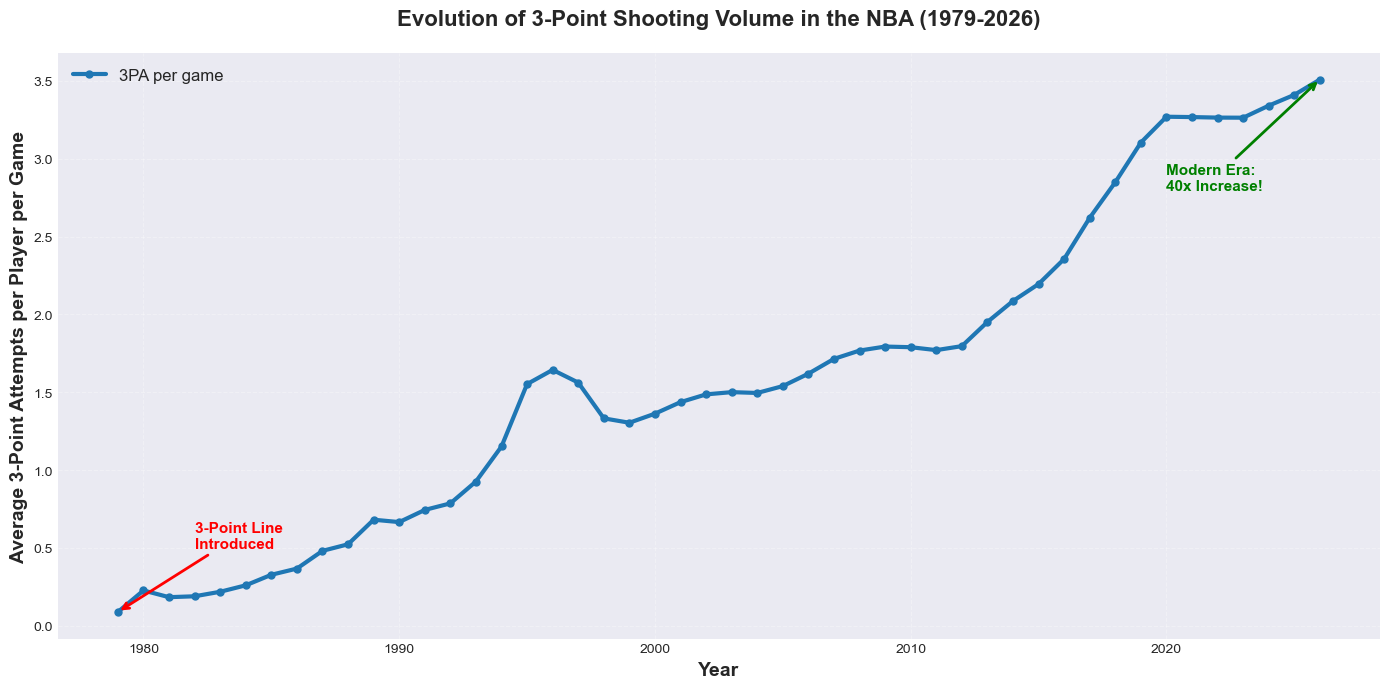

KEY INSIGHT: The 3-point attempts per player increased by 40x from 1979 to 2026


In [ ]:
#Create a figure with larger size
fig, ax = plt.subplots(figsize=(14, 7))

#Plot the 3-point attempts per game over time
ax.plot(yearly_3pt['year'], yearly_3pt['avg_3pa_per_game'], 
        linewidth=3, color='#1f77b4', marker='o', markersize=5, label='3PA per game')

#Figure Styling
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Average 3-Point Attempts per Player per Game', fontsize=14, fontweight='bold')
ax.set_title('Evolution of 3-Point Shooting Volume in the NBA (1979-2026)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=12)

# Add annotations for key eras
ax.annotate('3-Point Line\nIntroduced', xy=(1979, 0.088), xytext=(1982, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, color='red', fontweight='bold')

ax.annotate('Modern Era:\n40x Increase!', xy=(2026, 3.51), xytext=(2020, 2.8),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=11, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

print("KEY INSIGHT: The 3-point attempts per player increased by 40x from 1979 to 2026")

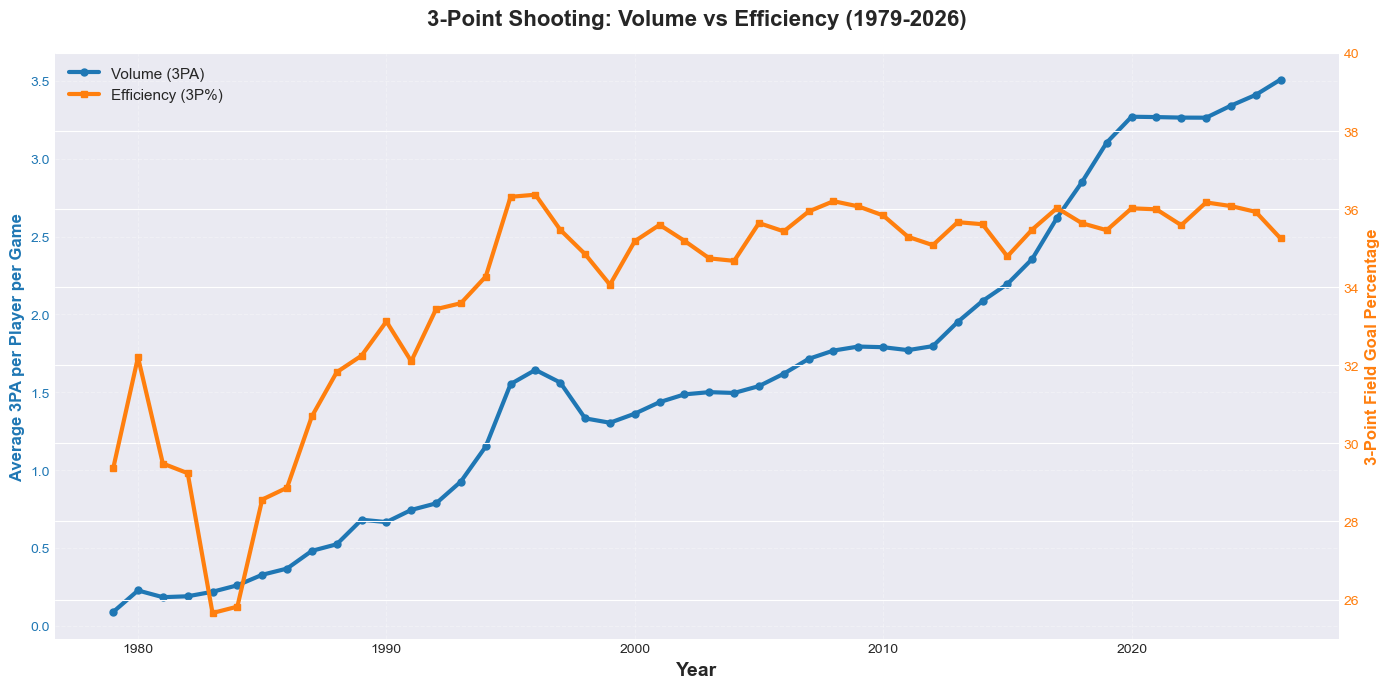


KEY INSIGHTS:
1. Volume increased 40x: 0.088 → 3.5 attempts per game (1979 → 2026)
2. Efficiency improved by ~6 percentage points overall (29% → 35%)
3. Since ~2000, 3P% has stabilized around 35-36%, even as volume exploded
   → This means the modern increase is driven by strategy, not just better shooters


In [ ]:
#Create a dual-axis plot to show both volume and efficiency over time
fig, ax1 = plt.subplots(figsize=(14, 7))

#Plot volume on the left axis
color1 = '#1f77b4'
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average 3PA per Player per Game', fontsize=12, fontweight='bold', color=color1)
ax1.plot(yearly_3pt['year'], yearly_3pt['avg_3pa_per_game'], 
         linewidth=3, color=color1, marker='o', markersize=5, label='Volume (3PA)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--')

#Create second y-axis for efficiency
ax2 = ax1.twinx()
color2 = '#ff7f0e'
ax2.set_ylabel('3-Point Field Goal Percentage', fontsize=12, fontweight='bold', color=color2)
ax2.plot(yearly_3pt['year'], yearly_3pt['three_point_pct'] * 100, 
         linewidth=3, color=color2, marker='s', markersize=5, label='Efficiency (3P%)')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim([25, 40])  # Set y-axis range for percentages

#Title
ax1.set_title('3-Point Shooting: Volume vs Efficiency (1979-2026)', 
              fontsize=16, fontweight='bold', pad=20)

#Combined Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

print("\nKEY INSIGHTS:")
print("1. Volume increased 40x: 0.088 → 3.5 attempts per game (1979 → 2026)")
print("2. Efficiency improved by ~6 percentage points overall (29% → 35%)")
print("3. Since ~2000, 3P% has stabilized around 35-36%, even as volume exploded")
print("   → This means the modern increase is driven by strategy, not just better shooters")


In [ ]:
#Prepare games data for home court advantage analysis
#Filter out games with missing gameType
games_clean = games_df[games_df['gameType'].notna()].copy()

#Keep only Regular Season and Playoffs
games_analysis = games_clean[games_clean['gameType'].isin(['Regular Season', 'Playoffs'])].copy()

#Create a column for whether home team won or not
games_analysis['home_win'] = (games_analysis['winner'] == games_analysis['hometeamId']).astype(int)

print(f"Total games for analysis: {len(games_analysis):,}")
print(f"\nBreakdown by game type:")
print(games_analysis['gameType'].value_counts())

print("\n" + "=" * 60)
print("Home win rate by game type:")
home_win_by_type = games_analysis.groupby('gameType')['home_win'].agg(['sum', 'count', 'mean'])
home_win_by_type.columns = ['Home Wins', 'Total Games', 'Home Win %']
home_win_by_type['Home Win %'] = home_win_by_type['Home Win %'] * 100
print(home_win_by_type)

Total games for analysis: 69,979

Breakdown by game type:
gameType
Regular Season    65538
Playoffs           4441
Name: count, dtype: int64

Home win rate by game type:
                Home Wins  Total Games  Home Win %
gameType                                          
Playoffs             2863         4441   64.467462
Regular Season      40399        65538   61.642101


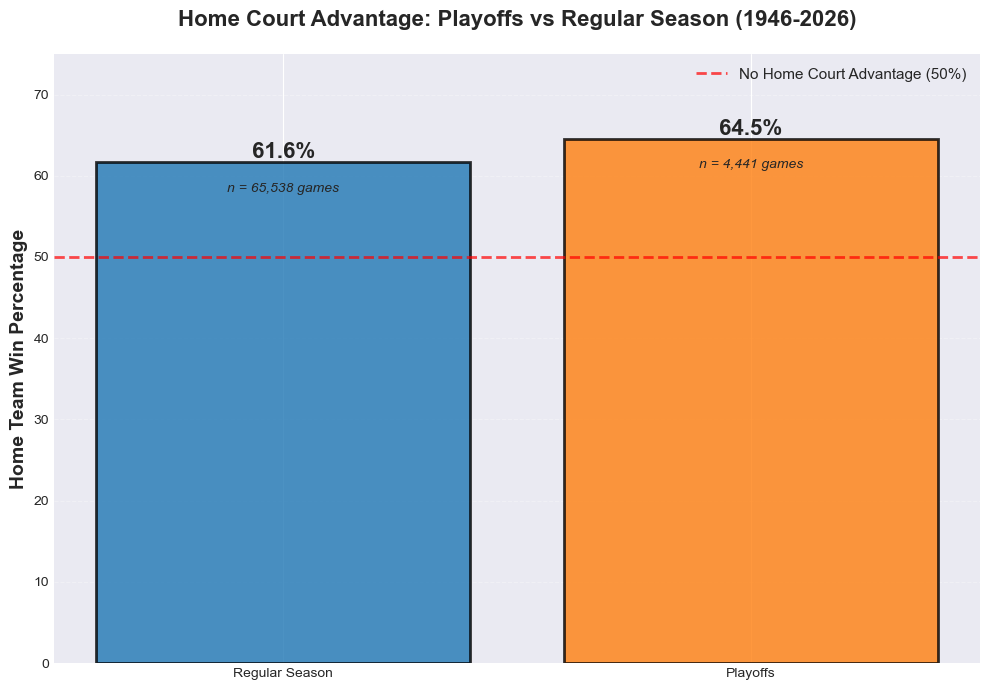


KEY INSIGHT: Home court advantage is ~3 percentage points STRONGER in playoffs
Regular Season: 61.6% | Playoffs: 64.5%

Possible reasons for this:
- Higher stakes (in the playoffs) increase crowd impact
- Travel fatigue (away team) is more significant in playoffs
- Familiar environment benefits home team in pressure situations


In [ ]:
#Create a bar chart comparing home court advantage
fig, ax = plt.subplots(figsize=(10, 7))

game_types = ['Regular Season', 'Playoffs']
home_win_rates = [61.64, 64.47]
colors = ['#1f77b4', '#ff7f0e']

bars = ax.bar(game_types, home_win_rates, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

#Add the value labels on bars
for bar, rate in zip(bars, home_win_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{rate:.1f}%',
            ha='center', va='bottom', fontsize=16, fontweight='bold')

#Add a reference line at 50% (means there is no home court advantage)
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='No Home Court Advantage (50%)')

#Figure Styling
ax.set_ylabel('Home Team Win Percentage', fontsize=14, fontweight='bold')
ax.set_title('Home Court Advantage: Playoffs vs Regular Season (1946-2026)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim([0, 75])
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.legend(fontsize=11)

#Add the sample size annotations
ax.text(0, 58, f'n = 65,538 games', ha='center', fontsize=10, style='italic')
ax.text(1, 61, f'n = 4,441 games', ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

print("\nKEY INSIGHT: Home court advantage is ~3 percentage points STRONGER in playoffs")
print("Regular Season: 61.6% | Playoffs: 64.5%")
print("\nPossible reasons for this:")
print("- Higher stakes (in the playoffs) increase crowd impact")
print("- Travel fatigue (away team) is more significant in playoffs")
print("- Familiar environment benefits home team in pressure situations")